In [1]:

#Urban Drivers Comprise the majority of Urban Fares at rought about 62%

#Judging from the scatter plot rural services tend to cost more then urban and suburban that maybe because
#they have to driver further from point a to point b.

#the number of drivers are proportional to the size of the cities



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
csv_path1="./raw_data/city_data.csv"
csv_path2="./raw_data/ride_data.csv"

pyber_df1=pd.read_csv(csv_path1)
pyber_df2=pd.read_csv(csv_path2)

pyber_df1.head()



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
pyber_df2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
merge_table=pd.merge(pyber_df1,pyber_df2,on="city")
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [67]:
new_df=merge_table.loc[:,["city","fare","type","driver_count","ride_id"]]

#specific types of cities
urban=new_df[new_df["type"]=="Urban"]
rural=new_df[new_df["type"]=="Rural"]
suburban=new_df[new_df["type"]=="Suburban"]

avg_fare_urban=urban.groupby(["city"]).mean()["fare"].round(1)
avg_fare_rural=rural.groupby(["city"]).mean()["fare"].round(1)
avg_fare_suburban=suburban.groupby("city").mean()["fare"].round(1)

urban_rides=urban.groupby(["city"]).count()["ride_id"]
rural_rides=rural.groupby(["city"]).count()["ride_id"]
suburban_rides=suburban.groupby(["city"]).count()["ride_id"]

urban_drivers=urban.groupby(["city"]).mean()["driver_count"]
rural_drivers=rural.groupby(["city"]).mean()["driver_count"]
suburban_drivers=suburban.groupby(["city"]).mean()["driver_count"]



city
Anitamouth              37.3
Campbellport            33.7
Carrollbury             36.6
Clarkstad               31.1
Conwaymouth             34.6
East Cherylfurt         31.4
East Jenniferchester    32.6
Floresberg              32.3
Jasonfort               27.8
Jeffreyton              33.2
Johnland                28.8
Kyleton                 31.2
Lake Brenda             29.8
Martinmouth             30.5
New Brandonborough      31.9
New Cindyborough        31.0
New Jessicamouth        32.8
New Lynn                28.5
New Michelleberg        25.0
New Samanthaside        34.1
North Tara              32.4
North Tracyfort         26.9
Paulfort                31.1
Port Alexandria         26.3
Port Guytown            28.2
Port James              31.8
Port Jose               31.2
Port Michelleview       26.7
Rodriguezview           31.9
Sarahview               33.9
South Gracechester      31.3
South Jennifer          29.8
South Shannonborough    26.5
Thomastown              30.3
Tiffanyto

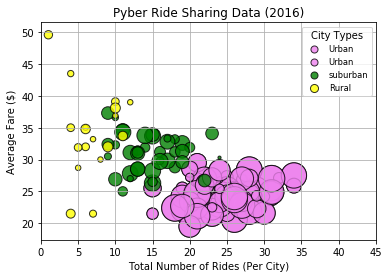

In [68]:
#urban
plt.scatter(urban_rides,
            avg_fare_urban,
            s=10*urban_drivers,  c="violet",edgecolor="black",
            linewidths=1, marker="o",alpha=0.8, label="Urban")
#suburban
plt.scatter(suburban_rides,
            avg_fare_suburban,
            s=10*suburban_drivers,  c="green",edgecolor="black",
            linewidths=1, marker="o",alpha=0.8, label="suburban")
#Rural
plt.scatter(rural_rides, 
            avg_fare_rural, 
            s=10*rural_drivers, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")


plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,45))
plt.grid(True)

#legend
legend = plt.legend(fontsize="small", mode="Expanded",numpoints=1, scatterpoints=1,loc="best", title="City Types",
                  labelspacing=0.5)

legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.show()


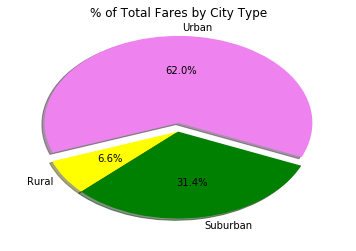

In [85]:
# Type Percents
type_per= 100 * new_df.groupby(["type"]).sum()["fare"] / new_df["fare"].sum()

# Build Pie Chart
plt.pie(type_per,labels=["Rural", "Suburban", "Urban"],colors=["yellow", "green", "violet"],explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=200)
plt.title("% of Total Fares by City Type")
plt.show()

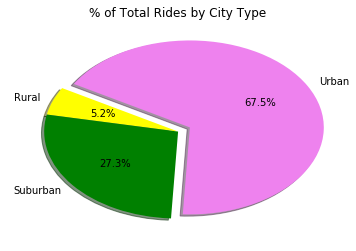

In [78]:
#  Ride Percents
ride_percents = 100 * new_df.groupby(["type"]).count()["ride_id"] / new_df["ride_id"].count()

plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["Yellow", "green", "violet"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=200)
plt.title("% of Total Rides by City Type")

plt.show()

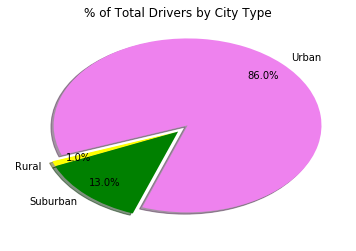

In [88]:

# Calculate Driver Percents
driver_percents = 100 * new_df.groupby(["type"]).sum()["driver_count"] / new_df["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "green", "violet"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.8,
        shadow=True, startangle=200
       )
plt.title("% of Total Drivers by City Type")

plt.show()